# Sentiment Analysis of Restaurant Reviews Through Machine Learning and NLP

**Problem Statement**

There are a total of 3,000 restaurant reviews that have been classified as either positive reviews or negative reviews; 2,400 of these reviews form the training dataset and the remaining 600 reviews form the test dataset.

Based on the data provided, a model is built that can classify these reviews as positive or negative (0 or 1) using NLP and ML algorithms.

In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import optuna
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data] 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       

True

In [3]:
df_train = pd.read_csv("sentiment_train.csv")

print(df_train.info())
print(df_train.head())

df_test = pd.read_csv("sentiment_test.csv")

print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
No

In [4]:
#checking if there's any missing values as blanks or nulls

df_train = df_train.replace(' ', np.nan)
df_train.isnull().sum()

df_test = df_test.replace(' ', np.nan)
df_test.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

Sentence    0
Polarity    0
dtype: int64

0    0.505417
1    0.494583
Name: Polarity, dtype: float64

<AxesSubplot:>

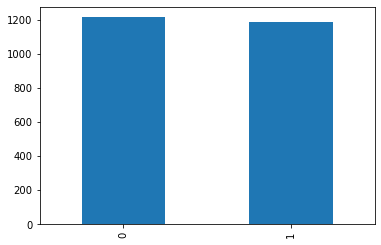

In [5]:
#checking data balance -> data is balanced

df_train['Polarity'].value_counts(normalize = True)
df_train['Polarity'].value_counts().plot.bar()

In [6]:
#checking if length of sentences contribute to polarity score - adding length feature

df_train['length']= df_train.Sentence.str.split().str.len()

In [7]:
df_train.head()

,Sentence,Polarity,length
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12


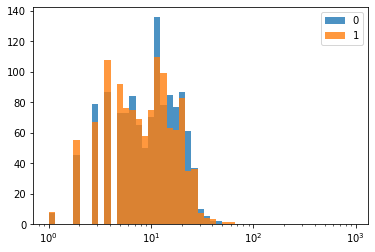

In [8]:
#plotting histogram of sentences against length -> significant overlap of histograms 
#suggest there is no relation between length and polarity score

import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df_train[df_train['Polarity']==0]['length'],bins=bins,alpha=0.8)
plt.hist(df_train[df_train['Polarity']==1]['length'],bins=bins,alpha=0.8)
plt.legend(('0','1'))
plt.show();

## Text Preprocessing

In [10]:
text = list(df_train['Sentence'])

In [11]:
import re
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [12]:
corpus[0]

'wow loved place'

## Test Train Split (followed by Vectorization Fit on Training Data)

In [13]:
# train test split (66% train - 33% test)
X = np.array(corpus)
y = df_train['Polarity']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (1608,)
Testing Data :  (792,)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

# fit transform the TfidfVectorizer
X_train_vector= tfidf.fit_transform(X_train)
X_train_vector.shape

(1608, 2789)

## Trying Different ML Algorithms (LR, NB, SVM)

## 1) Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_vector, y_train)

X_test_vector = tfidf.transform(X_test)
lr_predictions = lr.predict(X_test_vector)

LogisticRegression()

In [17]:
from sklearn import metrics

pd.DataFrame(metrics.confusion_matrix(y_test,lr_predictions), 
             index=['0','1'], columns=['0','1'])

print(metrics.classification_report(y_test,lr_predictions))
print(metrics.roc_auc_score(y_test,lr.predict_proba(X_test_vector)[:, 1]))

,0,1
0,321,67
1,105,299


              precision    recall  f1-score   support

           0       0.75      0.83      0.79       388
           1       0.82      0.74      0.78       404

    accuracy                           0.78       792
   macro avg       0.79      0.78      0.78       792
weighted avg       0.79      0.78      0.78       792

0.8737655659895887


## 2) Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_vector.toarray(), y_train)

gnb_predictions = gnb.predict(X_test_vector.toarray())

GaussianNB()

In [206]:
pd.DataFrame(metrics.confusion_matrix(y_test,gnb_predictions), 
             index=['0','1'], columns=['0','1'])

print(metrics.classification_report(y_test,gnb_predictions))
print(metrics.roc_auc_score(y_test,gnb.predict_proba(X_test_vector.toarray())[:, 1]))

,0,1
0,220,168
1,92,312


              precision    recall  f1-score   support

           0       0.71      0.57      0.63       388
           1       0.65      0.77      0.71       404

    accuracy                           0.67       792
   macro avg       0.68      0.67      0.67       792
weighted avg       0.68      0.67      0.67       792

0.6701796468306624


## 3) Support Vector Machine

In [207]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=0.025)
svm.fit(X_train_vector, y_train)

svm_predictions = svm.predict(X_test_vector)

SVC(C=0.025, kernel='linear')

In [210]:
pd.DataFrame(metrics.confusion_matrix(y_test,svm_predictions), 
             index=['0','1'], columns=['0','1'])

print(metrics.classification_report(y_test,svm_predictions))

,0,1
0,388,0
1,403,1


              precision    recall  f1-score   support

           0       0.49      1.00      0.66       388
           1       1.00      0.00      0.00       404

    accuracy                           0.49       792
   macro avg       0.75      0.50      0.33       792
weighted avg       0.75      0.49      0.32       792



### Logistic Regression yielded the best score amongst LR, Naive Bayes and SVM

# Limited Text Preprocessing (removing stopword remover and Lemmatizer) + Using Vectorizer with n-gram range + Logistic Regression

In [18]:
corpus2 = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = ' '.join(r)
    corpus2.append(r)

In [19]:
corpus2[0]

'wow loved this place'

In [20]:
# train test split (66% train - 33% test)
X = np.array(corpus2)
y = df_train['Polarity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

tfidf = TfidfVectorizer(ngram_range=(1, 2))

# fit transform the TfidfVectorizer
X_train_vector= tfidf.fit_transform(X_train)
X_train_vector.shape

lr = LogisticRegression()
lr.fit(X_train_vector, y_train)

X_test_vector = tfidf.transform(X_test)
lr_predictions = lr.predict(X_test_vector)

pd.DataFrame(metrics.confusion_matrix(y_test,lr_predictions), 
             index=['0','1'], columns=['0','1'])

print(metrics.classification_report(y_test,lr_predictions))
print(metrics.roc_auc_score(y_test,lr.predict_proba(X_test_vector)[:, 1]))

Training Data : (1608,)
Testing Data :  (792,)


(1608, 13876)

LogisticRegression()

,0,1
0,327,61
1,86,318


              precision    recall  f1-score   support

           0       0.79      0.84      0.82       388
           1       0.84      0.79      0.81       404

    accuracy                           0.81       792
   macro avg       0.82      0.81      0.81       792
weighted avg       0.82      0.81      0.81       792

0.9062946565275083


### AUC has improved from 0.8737 to 0.9063 with these steps while accuracy/F1 scores have increased from 0.78 to 0.81
### This suggests that removing stopwords or lemmatizing words lowered the ability of the algorithm to differentiate between positive and negative sentences as some negative words such as 'not', 'dont', 'no' are considered as stopwords by NLTK. Another observation is that using n-gram range (1,2) helps the algorithm as there are some bigrams in the sentences as well

## HyperParameter Tuning

In [21]:
def objective_lr(trial,X_train_vector,y_train):
    
    hyper_params_lr = {
        "class_weight": trial.suggest_categorical("class_weight",["balanced",None]),
        "max_iter": trial.suggest_int("max_iter",100,10000,step=10),
        "multi_class": trial.suggest_categorical("multi_class",
                                                 ["auto","ovr","multinomial"]),
        "C": trial.suggest_float("C",0.1,100,step=0.1),    
        "random_state": 17,
}

    
    
    LR = LogisticRegression(**hyper_params_lr)
    
    cv_scores_lr = cross_val_score(LR,X_train_vector,y_train,cv=2,scoring="f1_micro")
    score = np.mean(cv_scores_lr)
    
    return score

In [22]:
study = optuna.create_study(direction="maximize")

[I 2022-10-13 21:34:15,289] A new study created in memory with name: no-name-3cf248a1-5c87-4c8a-ad05-80f4fc9e999e


In [23]:
study.optimize(lambda trial: objective_lr(trial, X_train_vector,y_train), n_trials=300,  gc_after_trial=True)

[I 2022-10-13 21:34:18,758] Trial 0 finished with value: 0.7804726368159205 and parameters: {'class_weight': 'balanced', 'max_iter': 590, 'multi_class': 'auto', 'C': 65.89999999999999}. Best is trial 0 with value: 0.7804726368159205.
[I 2022-10-13 21:34:19,085] Trial 1 finished with value: 0.7810945273631842 and parameters: {'class_weight': 'balanced', 'max_iter': 5110, 'multi_class': 'ovr', 'C': 75.0}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:19,307] Trial 2 finished with value: 0.7730099502487563 and parameters: {'class_weight': 'balanced', 'max_iter': 370, 'multi_class': 'ovr', 'C': 3.9000000000000004}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:19,535] Trial 3 finished with value: 0.7730099502487562 and parameters: {'class_weight': None, 'max_iter': 8770, 'multi_class': 'auto', 'C': 6.5}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:19,843] Trial 4 finished with value: 0.779228855721393 and parameters: {'cla

[I 2022-10-13 21:34:30,806] Trial 35 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 8350, 'multi_class': 'multinomial', 'C': 93.5}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:31,237] Trial 36 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 8310, 'multi_class': 'multinomial', 'C': 92.4}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:31,537] Trial 37 finished with value: 0.7786069651741294 and parameters: {'class_weight': None, 'max_iter': 5180, 'multi_class': 'ovr', 'C': 82.1}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:31,819] Trial 38 finished with value: 0.7786069651741294 and parameters: {'class_weight': None, 'max_iter': 7070, 'multi_class': 'ovr', 'C': 91.7}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:32,334] Trial 39 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max

[I 2022-10-13 21:34:45,056] Trial 70 finished with value: 0.7779850746268657 and parameters: {'class_weight': None, 'max_iter': 8890, 'multi_class': 'auto', 'C': 75.2}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:45,590] Trial 71 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 8480, 'multi_class': 'multinomial', 'C': 91.2}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:46,138] Trial 72 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 9320, 'multi_class': 'multinomial', 'C': 92.6}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:46,585] Trial 73 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 8540, 'multi_class': 'multinomial', 'C': 81.6}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:34:47,101] Trial 74 finished with value: 0.7810945273631841 and parameters: {'class_weight': N

[I 2022-10-13 21:35:00,441] Trial 105 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 8610, 'multi_class': 'multinomial', 'C': 79.6}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:00,860] Trial 106 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 7290, 'multi_class': 'multinomial', 'C': 91.0}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:01,121] Trial 107 finished with value: 0.7786069651741294 and parameters: {'class_weight': None, 'max_iter': 9370, 'multi_class': 'ovr', 'C': 69.8}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:01,406] Trial 108 finished with value: 0.7792288557213931 and parameters: {'class_weight': None, 'max_iter': 4490, 'multi_class': 'auto', 'C': 98.2}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:01,804] Trial 109 finished with value: 0.7810945273631841 and parameters: {'class_weight': None

[I 2022-10-13 21:35:15,449] Trial 140 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 1130, 'multi_class': 'multinomial', 'C': 88.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:15,851] Trial 141 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 1580, 'multi_class': 'multinomial', 'C': 89.3}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:16,331] Trial 142 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 1910, 'multi_class': 'multinomial', 'C': 84.3}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:16,813] Trial 143 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 6260, 'multi_class': 'multinomial', 'C': 81.5}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:17,217] Trial 144 finished with value: 0.7792288557213931 and parameters: {'clas

[I 2022-10-13 21:35:31,124] Trial 175 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 4170, 'multi_class': 'multinomial', 'C': 96.8}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:31,586] Trial 176 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 4860, 'multi_class': 'multinomial', 'C': 97.5}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:31,989] Trial 177 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 4790, 'multi_class': 'multinomial', 'C': 97.8}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:32,454] Trial 178 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 4500, 'multi_class': 'multinomial', 'C': 99.4}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:32,788] Trial 179 finished with value: 0.7792288557213931 and parameters: {'clas

[I 2022-10-13 21:35:48,173] Trial 210 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 390, 'multi_class': 'multinomial', 'C': 83.1}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:48,792] Trial 211 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 7590, 'multi_class': 'multinomial', 'C': 79.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:49,430] Trial 212 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 1070, 'multi_class': 'multinomial', 'C': 79.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:50,056] Trial 213 finished with value: 0.7804726368159205 and parameters: {'class_weight': None, 'max_iter': 7700, 'multi_class': 'multinomial', 'C': 75.8}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:35:50,444] Trial 214 finished with value: 0.7786069651741294 and parameters: {'class

[I 2022-10-13 21:36:05,204] Trial 245 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 4180, 'multi_class': 'multinomial', 'C': 91.0}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:05,646] Trial 246 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 3510, 'multi_class': 'multinomial', 'C': 94.1}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:06,145] Trial 247 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 3930, 'multi_class': 'multinomial', 'C': 99.8}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:06,419] Trial 248 finished with value: 0.7792288557213931 and parameters: {'class_weight': None, 'max_iter': 3260, 'multi_class': 'ovr', 'C': 97.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:06,862] Trial 249 finished with value: 0.7810945273631841 and parameters: {'class_weight

[I 2022-10-13 21:36:20,054] Trial 280 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 6450, 'multi_class': 'multinomial', 'C': 84.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:20,501] Trial 281 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 5190, 'multi_class': 'multinomial', 'C': 87.1}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:20,939] Trial 282 finished with value: 0.7810945273631841 and parameters: {'class_weight': None, 'max_iter': 5790, 'multi_class': 'multinomial', 'C': 87.9}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:21,204] Trial 283 finished with value: 0.7786069651741294 and parameters: {'class_weight': None, 'max_iter': 5550, 'multi_class': 'ovr', 'C': 89.7}. Best is trial 1 with value: 0.7810945273631842.
[I 2022-10-13 21:36:21,667] Trial 284 finished with value: 0.7804726368159205 and parameters: {'class_weight

In [24]:
tuned_params=study.best_params
tuned_params

{'class_weight': 'balanced', 'max_iter': 5110, 'multi_class': 'ovr', 'C': 75.0}

In [25]:
lr = LogisticRegression(**tuned_params)
lr.fit(X_train_vector, y_train)

X_test_vector = tfidf.transform(X_test)
lr_predictions = lr.predict(X_test_vector)

pd.DataFrame(metrics.confusion_matrix(y_test,lr_predictions), 
             index=['0','1'], columns=['0','1'])

print(metrics.classification_report(y_test,lr_predictions))
print(metrics.roc_auc_score(y_test,lr.predict_proba(X_test_vector)[:, 1]))

LogisticRegression(C=75.0, class_weight='balanced', max_iter=5110,
                   multi_class='ovr')

,0,1
0,325,63
1,64,340


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       388
           1       0.84      0.84      0.84       404

    accuracy                           0.84       792
   macro avg       0.84      0.84      0.84       792
weighted avg       0.84      0.84      0.84       792

0.9177969021128916


### Hyperparameter Tuning has further increased AUC from 0.9063 to 0.9178 and accuracy/F1 scores have increased from 0.81 to 0.84

## Cross Validation Pipeline

In [259]:
#creating pipeline with Tfidvectorizer, logistic regression to run cross validation 
#to ensure no data leakage

from sklearn.pipeline import Pipeline

classifier = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(1, 2))), 
                       ('lr', LogisticRegression(**tuned_params))])

In [361]:
X = np.array(corpus2)
y = df_train['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "f1")

scores

print("f1 score: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.82157676, 0.82700422, 0.86307054, 0.87136929, 0.86178862,
       0.87903226, 0.83404255, 0.88163265, 0.76851852, 0.75      ])

f1 score: 0.84 (+/- 0.09)


In [363]:
X = np.array(corpus2)
y = df_train['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "accuracy")

scores

print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.82083333, 0.82916667, 0.8625    , 0.87083333, 0.85833333,
       0.875     , 0.8375    , 0.87916667, 0.79166667, 0.775     ])

accuracy: 0.84 (+/- 0.07)


In [364]:
X = np.array(corpus2)
y = df_train['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "roc_auc")

scores

print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.91412598, 0.91332731, 0.94089867, 0.93923189, 0.9526356 ,
       0.9434683 , 0.91395236, 0.95276466, 0.85871075, 0.83731592])

ROC_AUC: 0.92 (+/- 0.08)


## Testing Model on Test Data

In [365]:
unseentext = list(df_test['Sentence'])

corpus3 = []

for x in range(len(unseentext)):
    r = re.sub('[^a-zA-Z]', ' ', unseentext[x])
    r = r.lower()
    r = r.split()
    r = ' '.join(r)
    corpus3.append(r)


X = np.array(corpus3)
y = df_test['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "f1")

scores

print("f1 score: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.81355932, 0.73846154, 0.85714286, 0.69565217, 0.83076923,
       0.79365079, 0.70769231, 0.81355932, 0.83870968, 0.77419355])

f1 score: 0.79 (+/- 0.11)


In [366]:
X = np.array(corpus3)
y = df_test['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "accuracy")

scores

print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.81666667, 0.71666667, 0.83333333, 0.65      , 0.81666667,
       0.78333333, 0.68333333, 0.81666667, 0.83333333, 0.76666667])

accuracy: 0.77 (+/- 0.13)


In [367]:
X = np.array(corpus3)
y = df_test['Polarity']

scores = cross_val_score(classifier, X, y, cv=10,scoring = "roc_auc")

scores

print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

array([0.88950893, 0.8359375 , 0.86941964, 0.81979978, 0.87541713,
       0.80311457, 0.75973304, 0.88987764, 0.90211346, 0.85873192])

ROC_AUC: 0.85 (+/- 0.09)


## Confidence in and Review of Model

Though the accuracy, F1 score and ROC AUC scores are acceptably high for the training dataset and testing dataset, the standard deviation of the mean of these scores is also high, as shown above. This represents inconsistency in the performance of the model and in terms of the business point of view, this entails risk in deploying the model.

Similarly, all testing scores decreased from the training scores by about 6-7% when using the test dataset, meaning that there is some level of overfitting of the model on the training dataset.

Keeping these observations in mind, it would be better to try other (deep learning) algorithms and text preprocessing steps (such as spell checks) to attempt to improve the model further, mainly focusing on consistency

## Taking a deeper look in the model - trying to understand why some predictions are incorrect

#### We will first extract the list of False Negative and False Positive sentences into a table to observe them manually in an attempt to identify any patterns. We will then also tokenize the words of these sentences and plot individual graphs to see if there is a high recurring word in any of the two categories.

In [26]:
#'False Negative' instances as per final results on trained dataset

FN = X_test[(y_test == 1) & (lr_predictions == 0)]
FN= pd.DataFrame(FN)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', -1,
                       ):
    print(FN)

                                                                                                                                                                                0
0   cheap but hey it works was pleasantly suprised given the low cost of this item                                                                                               
1   talk about great customer service of course we will be back                                                                                                                  
2   conclusion very filling meals                                                                                                                                                
3   a good quality bargain i bought this after i bought a cheapy from big lots that sounded awful and people on the other end couldn t hear me                                   
4   yes this film does require a rather significant amount of puzzle solving but the pieces fit together to cr

In [27]:
#'False Positive' instances as per final results on trained dataset

FP = X_test[(y_test == 0) & (lr_predictions == 1)]
FP= pd.DataFrame(FP)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', -1,
                       ):
    print(FP)

                                                                                                                                                                             0
0   i find this inexcusable and so will probably be returning this phone and perhaps changing carriers                                                                        
1   very displeased                                                                                                                                                           
2   seems like a good quick place to grab a bite of some familiar pub food but do yourself a favor and look elsewhere                                                         
3   you can t relate with them hell you barely can understand them                                                                                                            
4   i put the latest os on it v g and it now likes to slow to a crawl and lock up every once in a while                      

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='frequency', ylabel='word'>

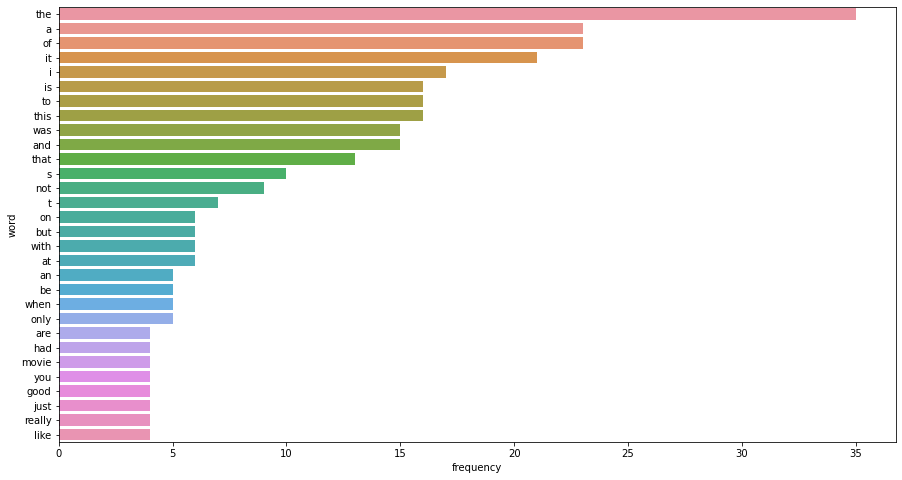

In [441]:
#plotting word frequency of False Negative instances

FNlist = X_test[(y_test == 1) & (lr_predictions == 0)].tolist()
FNstring = ''.join(FNlist)

from nltk.tokenize import word_tokenize

FNtokens = word_tokenize(FNstring)

from collections import Counter

FN_counted = Counter(FNtokens)

FN_word_freq = pd.DataFrame(FN_counted.items(),
                            columns=['word','frequency']).sort_values(
    by='frequency',ascending=False)

import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(x='frequency',y='word',data=FN_word_freq.head(30))

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='frequency', ylabel='word'>

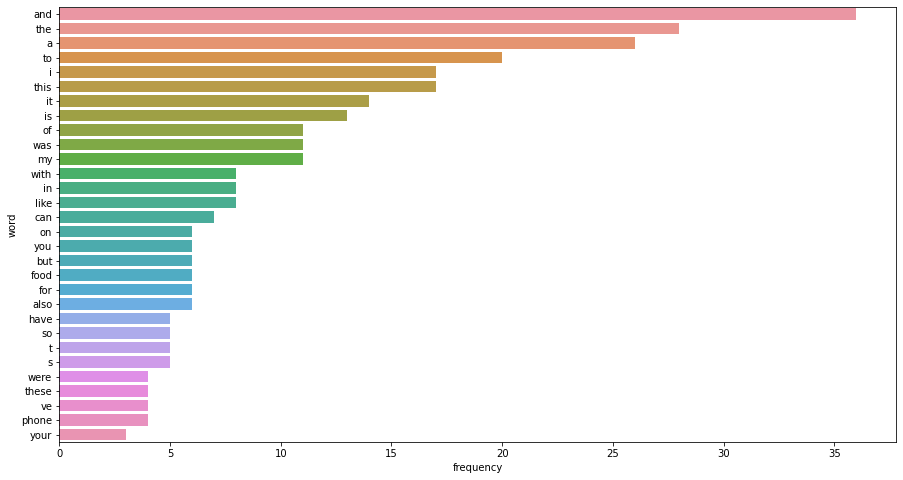

In [436]:
#plotting word frequency of False Positive instances

FPlist = X_test[(y_test == 0) & (lr_predictions == 1)].tolist()
FPstring = ''.join(FPlist)

FPtokens = word_tokenize(FPstring)

FP_counted = Counter(FPtokens)

FP_word_freq = pd.DataFrame(FP_counted.items(),
                            columns=['word','frequency']).sort_values(
    by='frequency',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x='frequency',y='word',data=FP_word_freq.head(30))

### There are not a lot of insights from the graphs as the most recurring words are naturally the stopwords which we did not remove from the sentences due to the reason highlighted above

Based on observing the FN and FP sentences, the model failed to predict some instances correctly due to a couple of reasons. These reasons have been listed below with examples:

**1) Sarcasm and the use of Irony (leading to False Positives)**

As with most NLP models, it is considerably challenging to identify the level of negation in sarcastic or ironic statements as they do not contain negative words and their meanings are often hidden in context or in the tone of the sentence. This can potentially lead to False Positives, as shown below:

In [31]:
# example of sarcastic sentences which came up as False Positives

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', -1,
                       ):
    print(FP.loc[[45,54]])

                                       0
45  i dressed up to be treated so rudely
54  say bye bye to your tip lady        


**2) The use of positive words in negative sentences (leading to False Positives)**

There are some sentences that are negative but contain positive words such as good or better leading to some degree of ambiguity

In [29]:
# example of negative sentences with positive words which came up as False Positives

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', -1,
                       ):
    print(FP.loc[[2,19]])

                                                                                                                            0
2   seems like a good quick place to grab a bite of some familiar pub food but do yourself a favor and look elsewhere        
19  we ve have gotten a much better service from the pizza place next door than the services we received from this restaurant


**3) The use of negative words in positive statements (leading to False Negatives)**

There are a lot of positive sentences that used the words 'not' or 'dont' and got categorized as negative statements leading to False Negatives

In [30]:
# example of negative sentences with positive words which came up as False Positives

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.max_colwidth', -1,
                       ):
    print(FN.loc[[13,56]])

                                                                                                                                                       0
13  because both ears are occupied background is not distracting at all                                                                                 
56  i don t know exactly what it is about this movie but we latched on to this endearing movie and it has become a special part of our family s memories
